In [ ]:
import pandas as pd


if __name__ == '__main__':

	df_aaup    = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/aaup.data', header=None)
	df_usnews  = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/usnews.data', header=None)

aaup = df_aaup.rename(columns={
    0: 'FICE',
    1: 'College name',
    2: 'State',
    3: 'Type',
    4: 'Avg salary - full prof',
    5: 'Avg salary - assoc prof',
    6: 'Avg salary - asst prof',
    7: 'Avg salary - all ranks',
    8: 'Avg compensation - full prof',
    9: 'Avg compensation - assoc prof',
    10: 'Avg compensation - asst prof',
    11: 'Avg compensation - all ranks',
    12: 'No. of full prof',
    13: 'No. of assoc prof',
    14: 'No. of asst prof',
    15: 'No. of instructors',
    16: 'No. of faculty - all ranks'
})

new_names = ['fice', 'college_name', 'state', 'public_private', 'math_sat_avg', 'verbal_sat_avg',
             'combined_sat_avg', 'act_avg', 'math_sat_1st_quart', 'math_sat_3rd_quart',
             'verbal_sat_1st_quart', 'verbal_sat_3rd_quart', 'act_1st_quart', 'act_3rd_quart',
             'num_applications_received', 'num_applicants_accepted', 'num_new_students_enrolled',
             'pct_new_students_top_10', 'pct_new_students_top_25', 'num_fulltime_undergrads',
             'num_parttime_undergrads', 'instate_tuition', 'outstate_tuition', 'room_board_cost',
             'room_cost', 'board_cost', 'additional_fees', 'estimated_book_costs',
             'estimated_personal_spending', 'pct_faculty_phd', 'pct_faculty_terminal_degree',
             'student_faculty_ratio', 'pct_alumni_donate', 'instructional_expense_per_student',
             'graduation_rate']

usnews = df_usnews.rename(columns=dict(enumerate(new_names)))

cols=['math_sat_avg', 'verbal_sat_avg',
             'combined_sat_avg', 'act_avg', 'math_sat_1st_quart', 'math_sat_3rd_quart',
             'verbal_sat_1st_quart', 'verbal_sat_3rd_quart', 'act_1st_quart', 'act_3rd_quart',
             'num_applications_received', 'num_applicants_accepted', 'num_new_students_enrolled',
             'pct_new_students_top_10', 'pct_new_students_top_25', 'num_fulltime_undergrads',
             'num_parttime_undergrads', 'instate_tuition', 'outstate_tuition', 'room_board_cost',
             'room_cost', 'board_cost', 'additional_fees', 'estimated_book_costs',
             'estimated_personal_spending', 'pct_faculty_phd', 'pct_faculty_terminal_degree',
             'student_faculty_ratio', 'pct_alumni_donate', 'instructional_expense_per_student',
             'graduation_rate']
usnews[cols] = usnews[cols].apply(pd.to_numeric, errors='coerce', axis=1)
usnews['TotalExp']=usnews['instate_tuition']+usnews['room_board_cost']+usnews['room_cost']+ usnews['board_cost']+ usnews['additional_fees']+ usnews['estimated_book_costs']+usnews['estimated_personal_spending']


# usnews.to_csv('usnewsread.csv', index=False)
# aaup.to_csv('aaupread.csv', index=False)
print(usnews)


       fice                       college_name state  public_private  \
0      1061          Alaska Pacific University    AK               2   
1      1063  University of Alaska at Fairbanks    AK               1   
2      1065     University of Alaska Southeast    AK               1   
3     11462  University of Alaska at Anchorage    AK               1   
4      1002        Alabama Agri. & Mech. Univ.    AL               1   
...     ...                                ...   ...             ...   
1297   3826        West Virginia State College    WV               1   
1298   3827           West Virginia University    WV               1   
1299   3830     West Virginia Wesleyan College    WV               2   
1300   3831            Wheeling Jesuit College    WV               2   
1301   3932              University of Wyoming    WY               1   

      math_sat_avg  verbal_sat_avg  combined_sat_avg  act_avg  \
0            490.0           482.0             972.0     20.0   
1    

In [ ]:
for column in usnews.columns:
  if usnews[column].dtypes=='float64':
    median=usnews[column].median()
    usnews[column].fillna(median,inplace=True)
print(usnews)




       fice                       college_name state  public_private  \
0      1061          Alaska Pacific University    AK               2   
1      1063  University of Alaska at Fairbanks    AK               1   
2      1065     University of Alaska Southeast    AK               1   
3     11462  University of Alaska at Anchorage    AK               1   
4      1002        Alabama Agri. & Mech. Univ.    AL               1   
...     ...                                ...   ...             ...   
1297   3826        West Virginia State College    WV               1   
1298   3827           West Virginia University    WV               1   
1299   3830     West Virginia Wesleyan College    WV               2   
1300   3831            Wheeling Jesuit College    WV               2   
1301   3932              University of Wyoming    WY               1   

      math_sat_avg  verbal_sat_avg  combined_sat_avg  act_avg  \
0            490.0           482.0             972.0     20.0   
1    

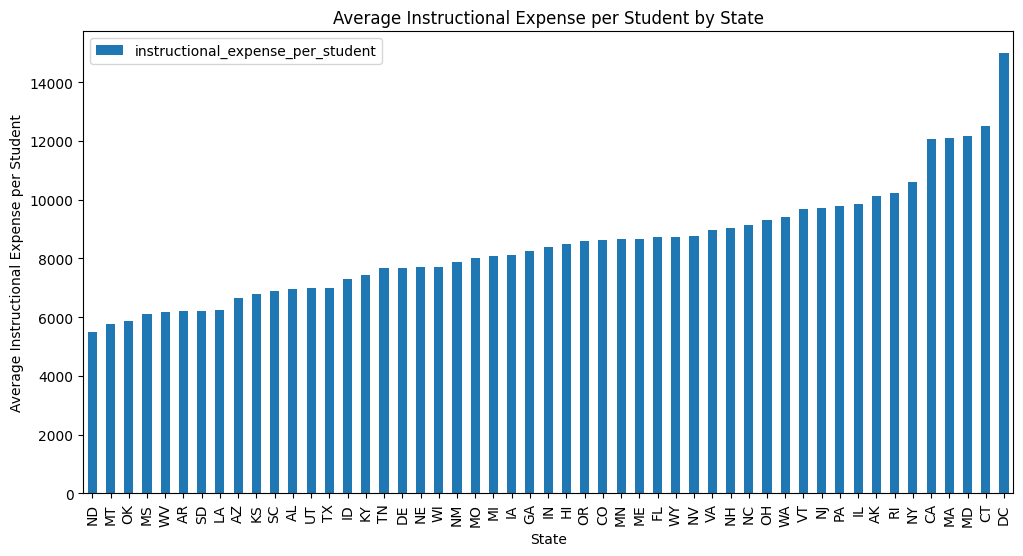

['DC', 'CT', 'MD', 'MA', 'CA', 'NY', 'RI', 'AK', 'IL', 'PA', 'NJ', 'VT', 'WA', 'OH', 'NC', 'NH', 'VA', 'NV', 'WY', 'FL']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


cols = ['state', 'instructional_expense_per_student']
df = usnews[cols]

# Group the data by state and calculate the mean
state_means = df.groupby('state').mean()

# Sort the states by average expenditure in decreasing order
state_means = state_means.sort_values('instructional_expense_per_student', ascending=True)

# Plot a bar graph of the mean expenditure for each state
state_means.plot(kind='bar', figsize=(12,6))
plt.title('Average Instructional Expense per Student by State')
plt.xlabel('State')
plt.ylabel('Average Instructional Expense per Student')
plt.show()


top_states = state_means.nlargest(20, 'instructional_expense_per_student').index.tolist()
list1=top_states
print(list1)

['WY', 'ND', 'AK', 'UT', 'SD', 'NV', 'MS', 'OK', 'AZ', 'NE', 'AR', 'AL', 'TX', 'HI', 'NC', 'TN', 'CO', 'MT', 'KY', 'WV']


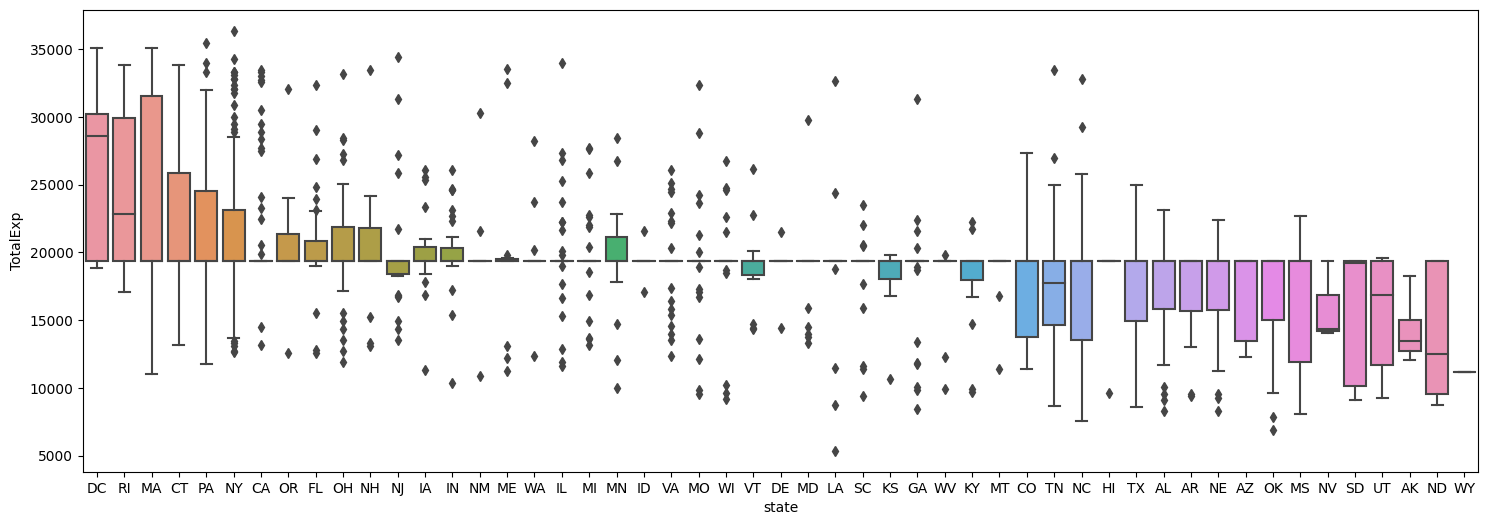

In [ ]:
import pandas as pd
import seaborn as sns

student_expenditure_mean = usnews.groupby('state')['TotalExp'].mean().sort_values(ascending=False)

sorted_data = usnews.loc[usnews['state'].isin(student_expenditure_mean.index)].sort_values(by='state')
plt.figure(figsize=(18, 6))
sns.boxplot(x='state', y='TotalExp', data=sorted_data, order=student_expenditure_mean.index)

student_expenditure_mean = usnews.groupby('state')['TotalExp'].mean()

top_20_states = student_expenditure_mean.sort_values().head(20)
list2=top_20_states.index.tolist()
print(list2)

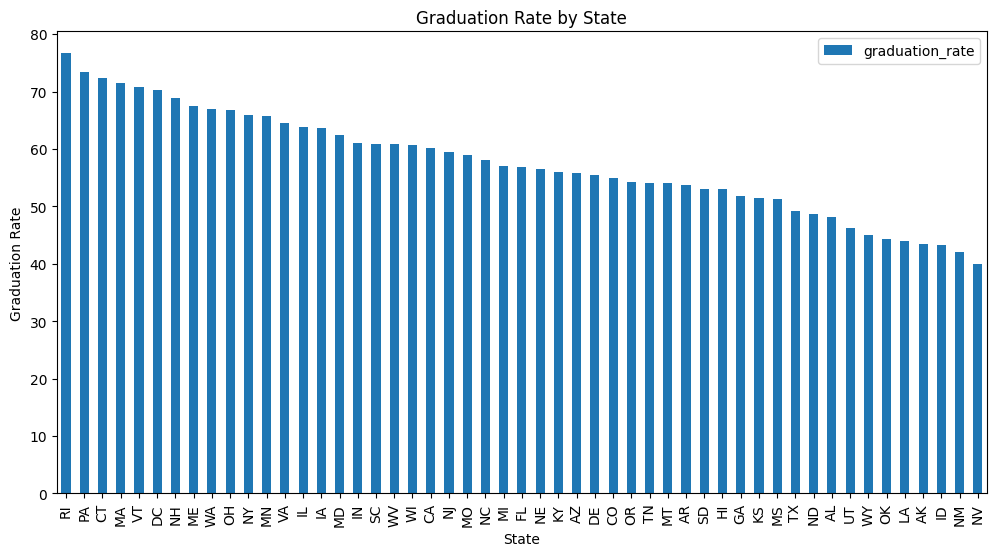

['RI', 'PA', 'CT', 'MA', 'VT', 'DC', 'NH', 'ME', 'WA', 'OH', 'NY', 'MN', 'VA', 'IL', 'IA', 'MD', 'IN', 'SC', 'WV', 'WI']


In [ ]:
cols = ['state', 'graduation_rate']
df = usnews[cols]

state_means = df.groupby('state').mean()
state_means = state_means.sort_values('graduation_rate', ascending=False)
top_20_states = state_means.head(20)
list3=top_20_states.index.tolist()

state_means.plot(kind='bar', figsize=(12,6))
plt.title('Graduation Rate by State')
plt.xlabel('State')
plt.ylabel('Graduation Rate')
plt.show()
print(list3)

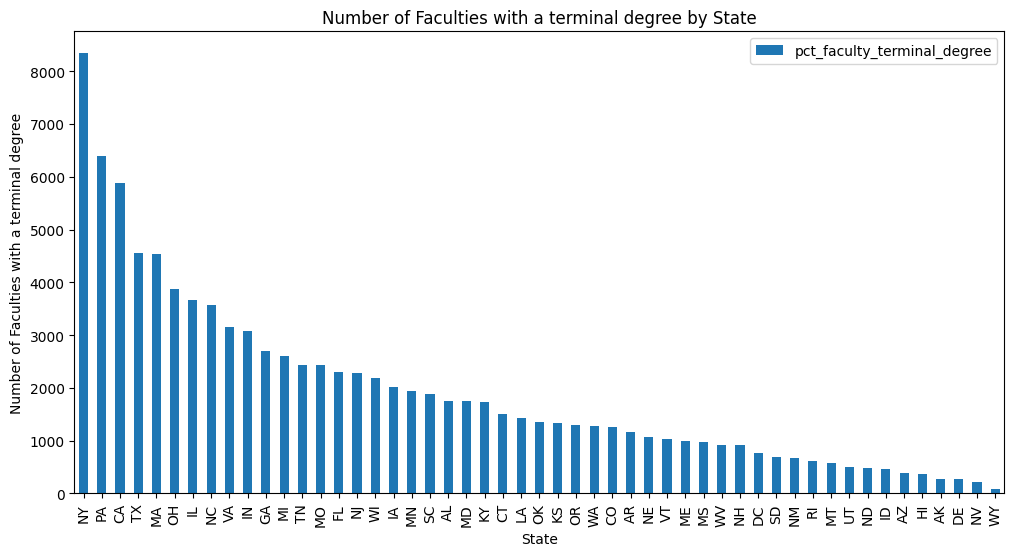

['NY', 'PA', 'CA', 'TX', 'MA', 'OH', 'IL', 'NC', 'VA', 'IN', 'GA', 'MI', 'TN', 'MO', 'FL', 'NJ', 'WI', 'IA', 'MN', 'SC']


In [ ]:
cols = ['state', 'pct_faculty_terminal_degree']
df = usnews[cols]

state_sums = df.groupby('state').sum()

state_sums = state_sums.sort_values('pct_faculty_terminal_degree', ascending=False)

top_states = state_sums.head(20)
list4=top_states.index.tolist()

state_sums.plot(kind='bar', figsize=(12,6))
plt.title('Number of Faculties with a terminal degree by State')
plt.xlabel('State')
plt.ylabel('Number of Faculties with a terminal degree')
plt.show()
print(list4)

In [ ]:
a=set(list1).intersection(list2,list3)
b=set(list2).intersection(list3,list4)
c=set(list3).intersection(list4,list1)
d=set(list4).intersection(list1,list2)
common_elements=a.union(b,c,d)
print(common_elements)

{'PA', 'IL', 'VA', 'NY', 'OH', 'NC', 'MA'}
